### 주택 가격 예측 (House Price Regression)

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# 경고문 미표시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터프레임 표시 제한 설정
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

### 데이터 불러오기

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
data = housing['frame']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,'Wd Sdng','Wd Shng',...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
target = 'SalePrice'

X = data.select_dtypes(include=['number'])
X = X.drop(['Id', 'SalePrice'], axis=1)
y = data[target]

In [5]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, stratify=X['OverallQual'], random_state=42)

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=200, max_depth=2, random_state=42)
random_forest.fit(X_tr, y_tr)

RandomForestRegressor(max_depth=2, n_estimators=200, random_state=42)

### Shap 분석

In [6]:
# shap value - Tree 모델
# !pip install shap

import shap
explainer = shap.TreeExplainer(random_forest) # 모델을 shap value 계산을 위한 TreeExplainer로 변환
shap_values = explainer.shap_values(X_val)    # Shap Values 계산

In [7]:
# graph 초기화
shap.initjs() 

### Shap Force Plot (모델의 예측을 설명)

1. 설명:

- 빨간색 화살표: 예측값을 증가시키는 특성들 (양의 영향)
- 파란색 화살표: 예측값을 감소시키는 특성들 (음의 영향)
- 화살표의 길이: 영향력의 크기
- 중앙의 값: 기본값 (base value)
- 오른쪽 끝의 값: 최종 예측값
- 특성값: 각 화살표 위에 해당 특성의 실제 값이 표시됨

2. 활용:
- 개별 예측에 대한 상세 분석 가능
- 특성들의 상대적 중요도 파악
- 모델의 의사결정 과정 이해
- 예측의 신뢰성 평가

https://zzinnam.tistory.com/entry/SHAP-value%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%86%8C%EA%B0%9Cwith-Python

In [8]:
# 모델의 기본 예측값 (전체 데이터셋의 평균 예측값)
explainer.expected_value

array([180514.2938613])

In [9]:
#  각 변수(특성)이 예측에 미치는 영향력
pd.DataFrame(shap_values, columns=X_val.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,-34580.693795,0.0,0.0,0.0,0.0,-23.166876,0.0,0.0,-8.090618,-9.648625,0.0,0.0,13610.672723,0.0,0.0,-825.175630,0.0,0.0,0.0,0.0,91.395938,0.0,166.562416,-574.205128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,69273.697625,0.0,0.0,0.0,0.0,-86.985062,0.0,0.0,-62.400050,-68.962279,0.0,0.0,4604.003795,0.0,0.0,377.927915,0.0,0.0,0.0,0.0,34.492710,0.0,-2137.105753,4713.178515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-34502.153598,0.0,0.0,0.0,0.0,64.536297,0.0,0.0,-8.090618,-9.648625,0.0,0.0,13610.672723,0.0,0.0,949.598008,0.0,0.0,0.0,0.0,91.395938,0.0,166.562416,-574.205128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,27733.814484,0.0,0.0,0.0,0.0,-86.985062,0.0,0.0,-8.090618,-9.648625,0.0,0.0,7215.984113,0.0,0.0,888.972666,0.0,0.0,0.0,0.0,34.492710,0.0,-1778.651767,-2104.521455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-40614.758814,0.0,0.0,0.0,0.0,-23.166876,0.0,0.0,-8.090618,-9.648625,0.0,0.0,-8494.734658,0.0,0.0,-825.175630,0.0,0.0,0.0,0.0,91.395938,0.0,166.562416,1283.048949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.0,0.0,0.0,28392.118803,0.0,0.0,0.0,0.0,-86.985062,0.0,0.0,-8.090618,-9.648625,0.0,0.0,7587.777163,0.0,0.0,888.972666,0.0,0.0,0.0,0.0,-26.559387,0.0,-2372.716581,-2104.521455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,0.0,0.0,0.0,-38447.687945,0.0,0.0,0.0,0.0,64.536297,0.0,0.0,-8.090618,-9.648625,0.0,0.0,-6572.229939,0.0,0.0,-825.175630,0.0,0.0,0.0,0.0,-70.374872,0.0,166.562416,-574.205128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,0.0,0.0,0.0,-34980.694135,0.0,0.0,0.0,0.0,-23.166876,0.0,0.0,-8.090618,-9.648625,0.0,0.0,13610.672723,0.0,0.0,-825.175630,0.0,0.0,0.0,0.0,-70.374872,0.0,-1381.900935,-574.205128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,-33506.475022,0.0,0.0,0.0,0.0,-23.166876,0.0,0.0,-8.090618,-9.648625,0.0,0.0,-8346.293803,0.0,0.0,-825.175630,0.0,0.0,0.0,0.0,-70.374872,0.0,-1381.900935,-574.205128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 첫 번째 샘플의 Shap Value
shap.force_plot(explainer.expected_value, shap_values[0,:], X_val.iloc[0,:])

In [11]:
# Shap Force Plot 출력 (전체 데이터셋)
shap.force_plot(explainer.expected_value, shap_values, X_val) 

### Shap Summary Plot (모델의 전체적인 특성 중요도와 영향을 설명)

1. 주요 해석 포인트:

    1. Y축 (특성):
        - 특성들이 중요도 순으로 정렬됨
        - 상단에 위치할수록 모델의 예측에 더 큰 영향을 미치는 특성

    2. X축 (SHAP value):
        - 각 특성이 예측에 미치는 영향의 크기
        - 음수: 예측값을 감소시키는 영향
        - 양수: 예측값을 증가시키는 영향

    3. 색상 표현:
        - 빨간색: 해당 특성의 높은 값
        - 파란색: 해당 특성의 낮은 값
        - 각 점의 색상은 원래 특성값의 크기를 나타냄

    4. 점들의 분포:
        - 수평 방향으로 퍼져있는 정도: 해당 특성의 영향력 변동성
        - 점들이 더 넓게 퍼져있을수록 상황에 따라 영향력이 크게 달라짐

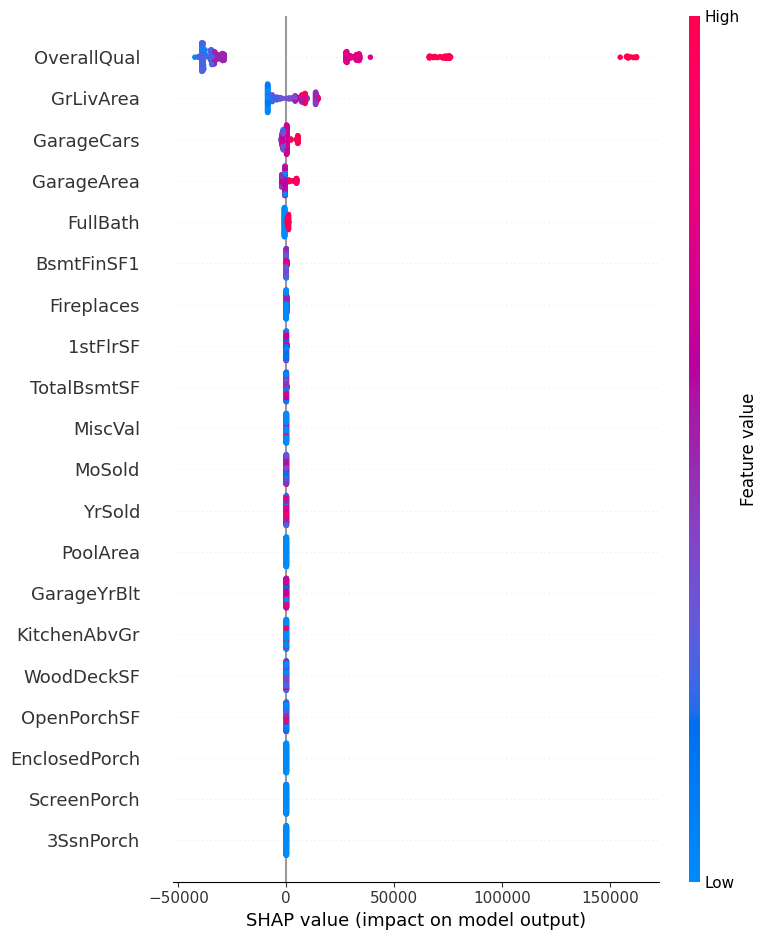

In [12]:
# Shap Summary Plot
shap.summary_plot(shap_values, X_val)

[해석]

- OverallQual 특성: 상단에 위치, 넓은 분포
    - 모델에서 가장 중요한 특성
    - 높은 값(빨간색)일 때 예측값 증가
    - 낮은 값(파란색)일 때 예측값 감소

- GarageArea 특성: 중간에 위치, 좁은 분포
    - 중간 정도의 중요도
    - 일관된 영향력 보임

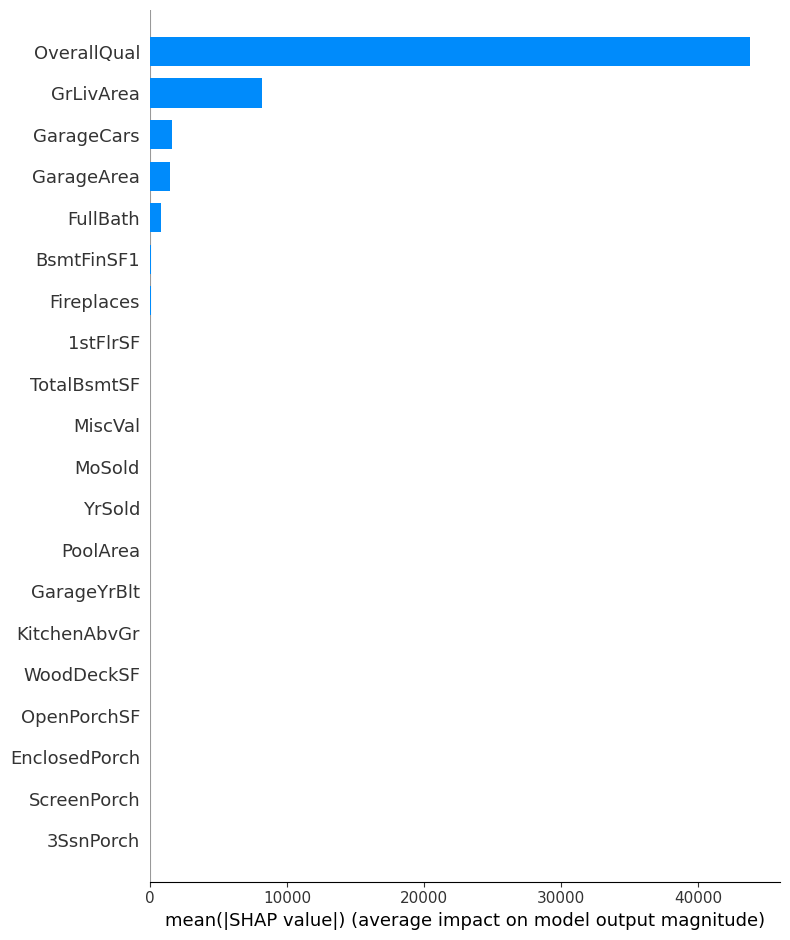

In [13]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_val, plot_type = "bar")